<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pySTALAGMITE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>STALAGMITE</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pySTALAGMITE.png"></td>
</tr>
</table>

----
# `pySTALAGMITE`

pySTALAGMITE, a program package prediction the shape of a stalagmite from pre-defined climate conditions.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sys

import libCHEM,libSTALAGMITE

----
# Climatic control
In this notebook, we discuss a simple climate driver for the growth of stalagmites.

The growth of stalagmites is controlled by **climate conditions**.
The main controlling parameter values are:
- **temperature:** Both the surface and the cave temperature are relevant.
- **precipitation:** controls the amount of water arriving in the cave as droplets.
- **CO$_2$ partial pressure:** controls via the soil the amount of calcite dissolved, and via cave atmosphere the calcium equilibrium.

As shown below, climate conditions between **glacial** and **interglacial** stages are different.
- Interglacial conditions favour precipitation (e.g. speleothem growth)
- Glacial conditions favor dissolution (e.g. solution pockets)

<img src='images/Kempe_scheme_stages.jpg'>

---
## Climate driver
We create a simple climate driver by defining climate values for glacial and interglacial conditions for
- Surface temperature, $T_{surf}$, `tempSurf`
- Soil temperature, $T_{soil}$, `tempSoil`
- Soil carbon-dioxide pressure, $P_{soil}$, `pco2Soil`
- Cave temperature, $T_{cave}$, `tempCave`
- Cave carbon-dioxide pressure, $P_{cave}$, `pco2Cave`
- Cave drip interval, $D_{cave}$, `dropCave`

We need the functions `readParameter2D` and `createTime2D` to run the climate driver `createClimateLinear2D` ...

In [2]:
help(libSTALAGMITE.createClimateLinear2D)

Help on function createClimateLinear2D in module libSTALAGMITE:

createClimateLinear2D(time, timemin, timemax, tempSoilmin, tempSoilmax, pco2Soilmin, pco2Soilmax, tempCavemin, tempCavemax, pco2Cavemin, pco2Cavemax, dropCavemin, dropCavemax, plot=False)
    function ...



We read the standard input file with `readParameter2D`, then create the time sequence with `createTime2D`.

With the time defined and the glaciual and interglacial values read in, the function `createClimateLinear2D` is called,
which creates a **linear interpolator** for the climate variables, using the function `scipy.interpolate.interp1d`.
With the flag `plot` there is an option ro plot the climate dependence.

== STALAGMITE ==
                         path:                work/
                 sidex [m],nx:       0.40        801
              init_height [m]:       0.01
          timemin,timemax [a]:  -10000.00         0.00
       timestep,timewrite [a]:      10.00      1000.00
  tempSoilmin,tempSoilmax [C]:       0.00        10.00
pco2Soilmin,pco2Soilmax [ppm]:   30000.00     30000.00
  pco2Atmmin,pco2Atmmax [ppm]:     400.00       400.00
  tempCavemin,tempCavemax [C]:      10.00        10.00
pco2Cavemin,pco2Cavemax [ppm]:     400.00       400.00
  dropCavemin,dropCavemax [s]:    1000.00       100.00


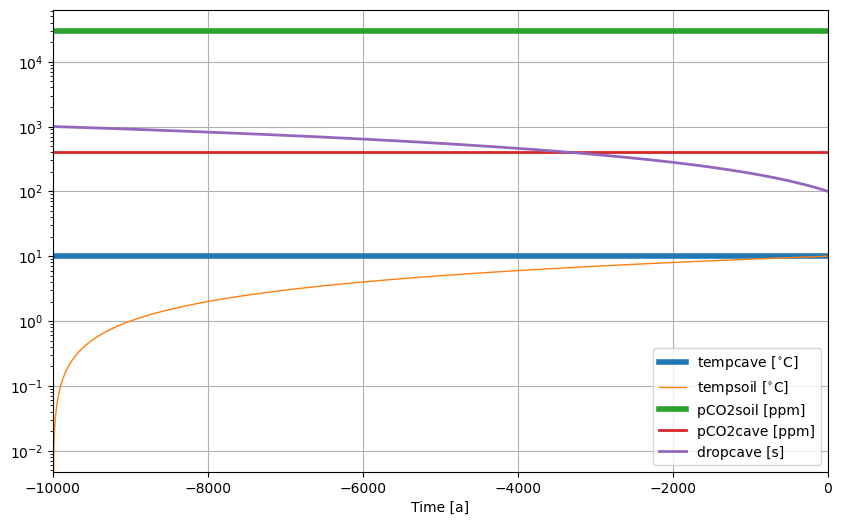

In [3]:
sidex,nx,init_height,timemin,timemax,timestep,timewrite,tempSoilmin,tempSoilmax,pco2Soilmin,pco2Soilmax, \
        pco2Atmmin,pco2Atmmax,tempCavemin,tempCavemax,pco2Cavemin,pco2Cavemax,dropCavemin,dropCavemax = \
        libSTALAGMITE.readParameter2D(infile='STALAGMITE_parameter.in',path='work/',control=True)
time = libSTALAGMITE.createTime2D(timemin,timemax,timestep)

tempSoil,tempCave,pco2Soil,pco2Cave,dropCave = libSTALAGMITE.createClimateLinear2D(time,timemin,timemax,tempSoilmin,tempSoilmax,pco2Soilmin,pco2Soilmax, \
            tempCavemin,tempCavemax,pco2Cavemin,pco2Cavemax,dropCavemin,dropCavemax,plot=True)

----